In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Exploratory Analysis

In [4]:
df1 = pd.read_csv('./evaluation/evPm16cities.csv')
df2 = pd.read_csv('./evaluation/evPc16cities.csv')
df2 = df2.fillna(0.7)
df = pd.concat([df1, df2])
df = df.drop(['Unnamed: 0'], axis=1)

In [133]:
df.describe()

,MBF,bestFitness,nIter,pm,pc,popSize
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,342.417050,307.871918,2060.726667,0.800000,0.800000,10.0
std,24.717053,19.618619,1240.984957,0.153008,0.153008,0.0
min,304.785083,284.380863,70.000000,0.500000,0.500000,10.0
25%,323.263525,292.505503,460.250000,0.700000,0.700000,10.0
50%,335.557876,314.999086,2999.000000,0.900000,0.900000,10.0
75%,359.032881,321.584914,2999.000000,0.900000,0.900000,10.0
max,436.666082,380.754988,2999.000000,0.900000,0.900000,10.0


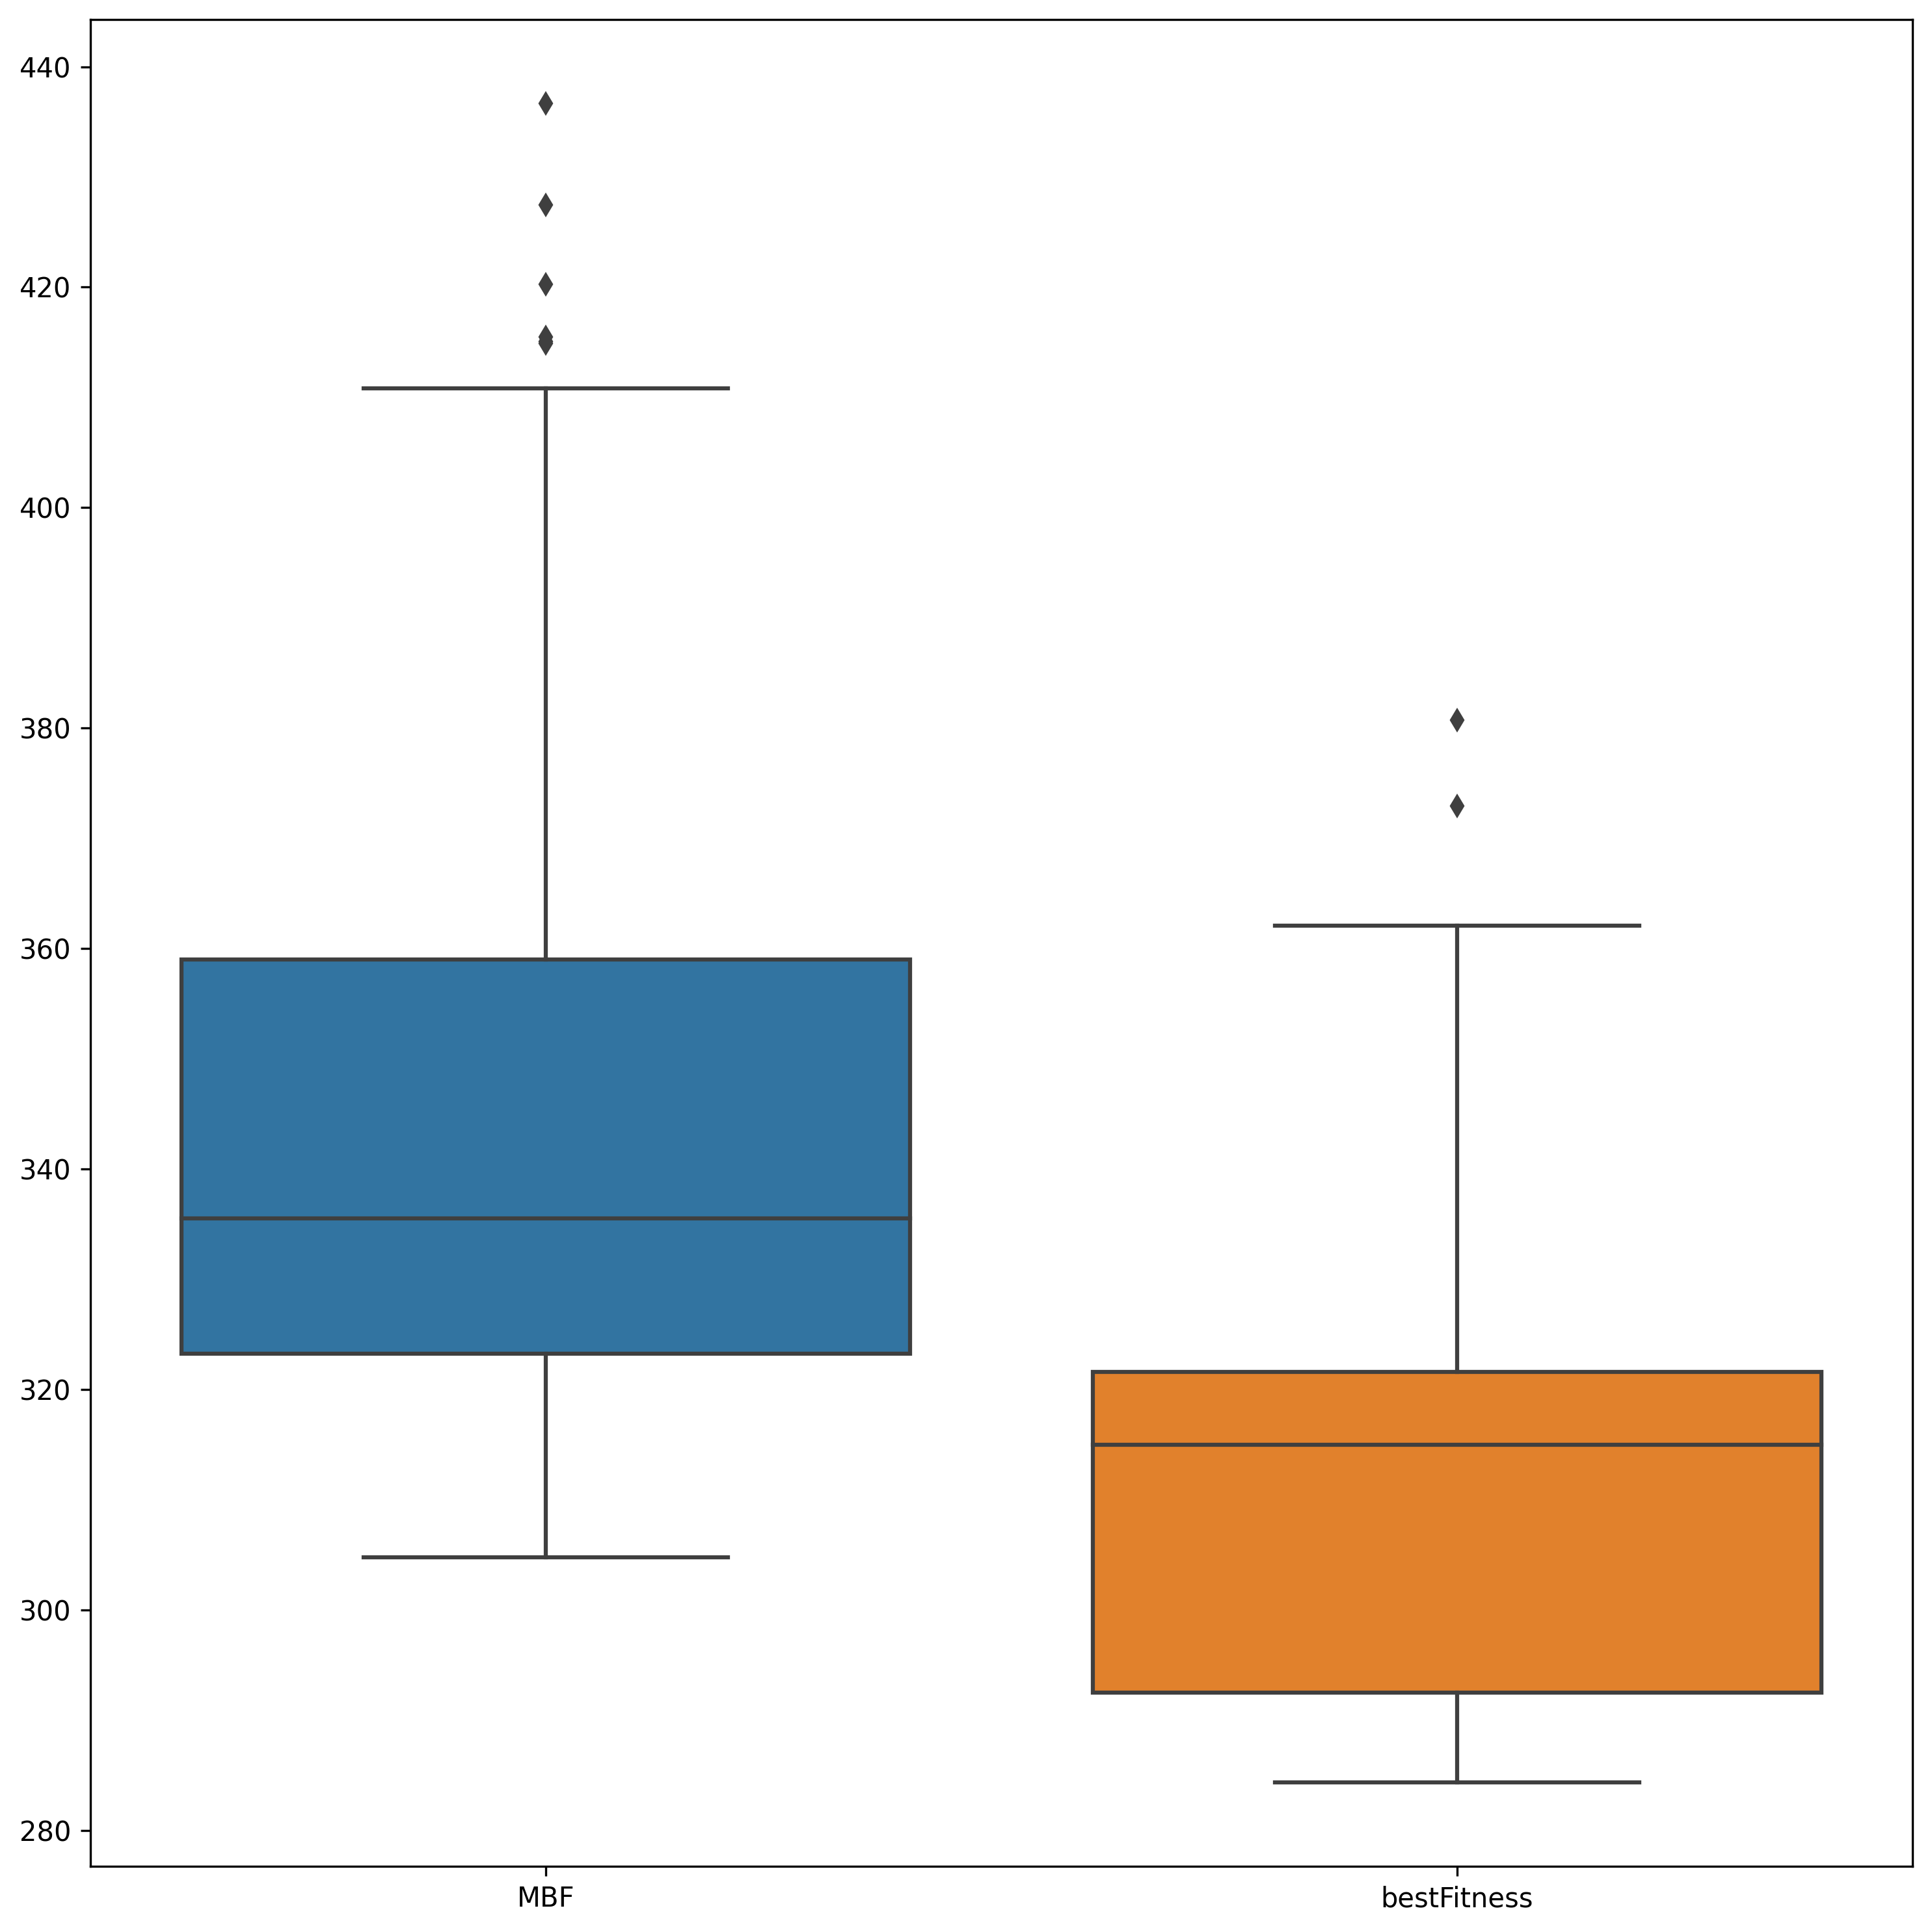

In [174]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
sns.boxplot(df[['MBF', 'bestFitness']])
plt.tight_layout()
plt.savefig('./figures/16citiesboxplot.png')

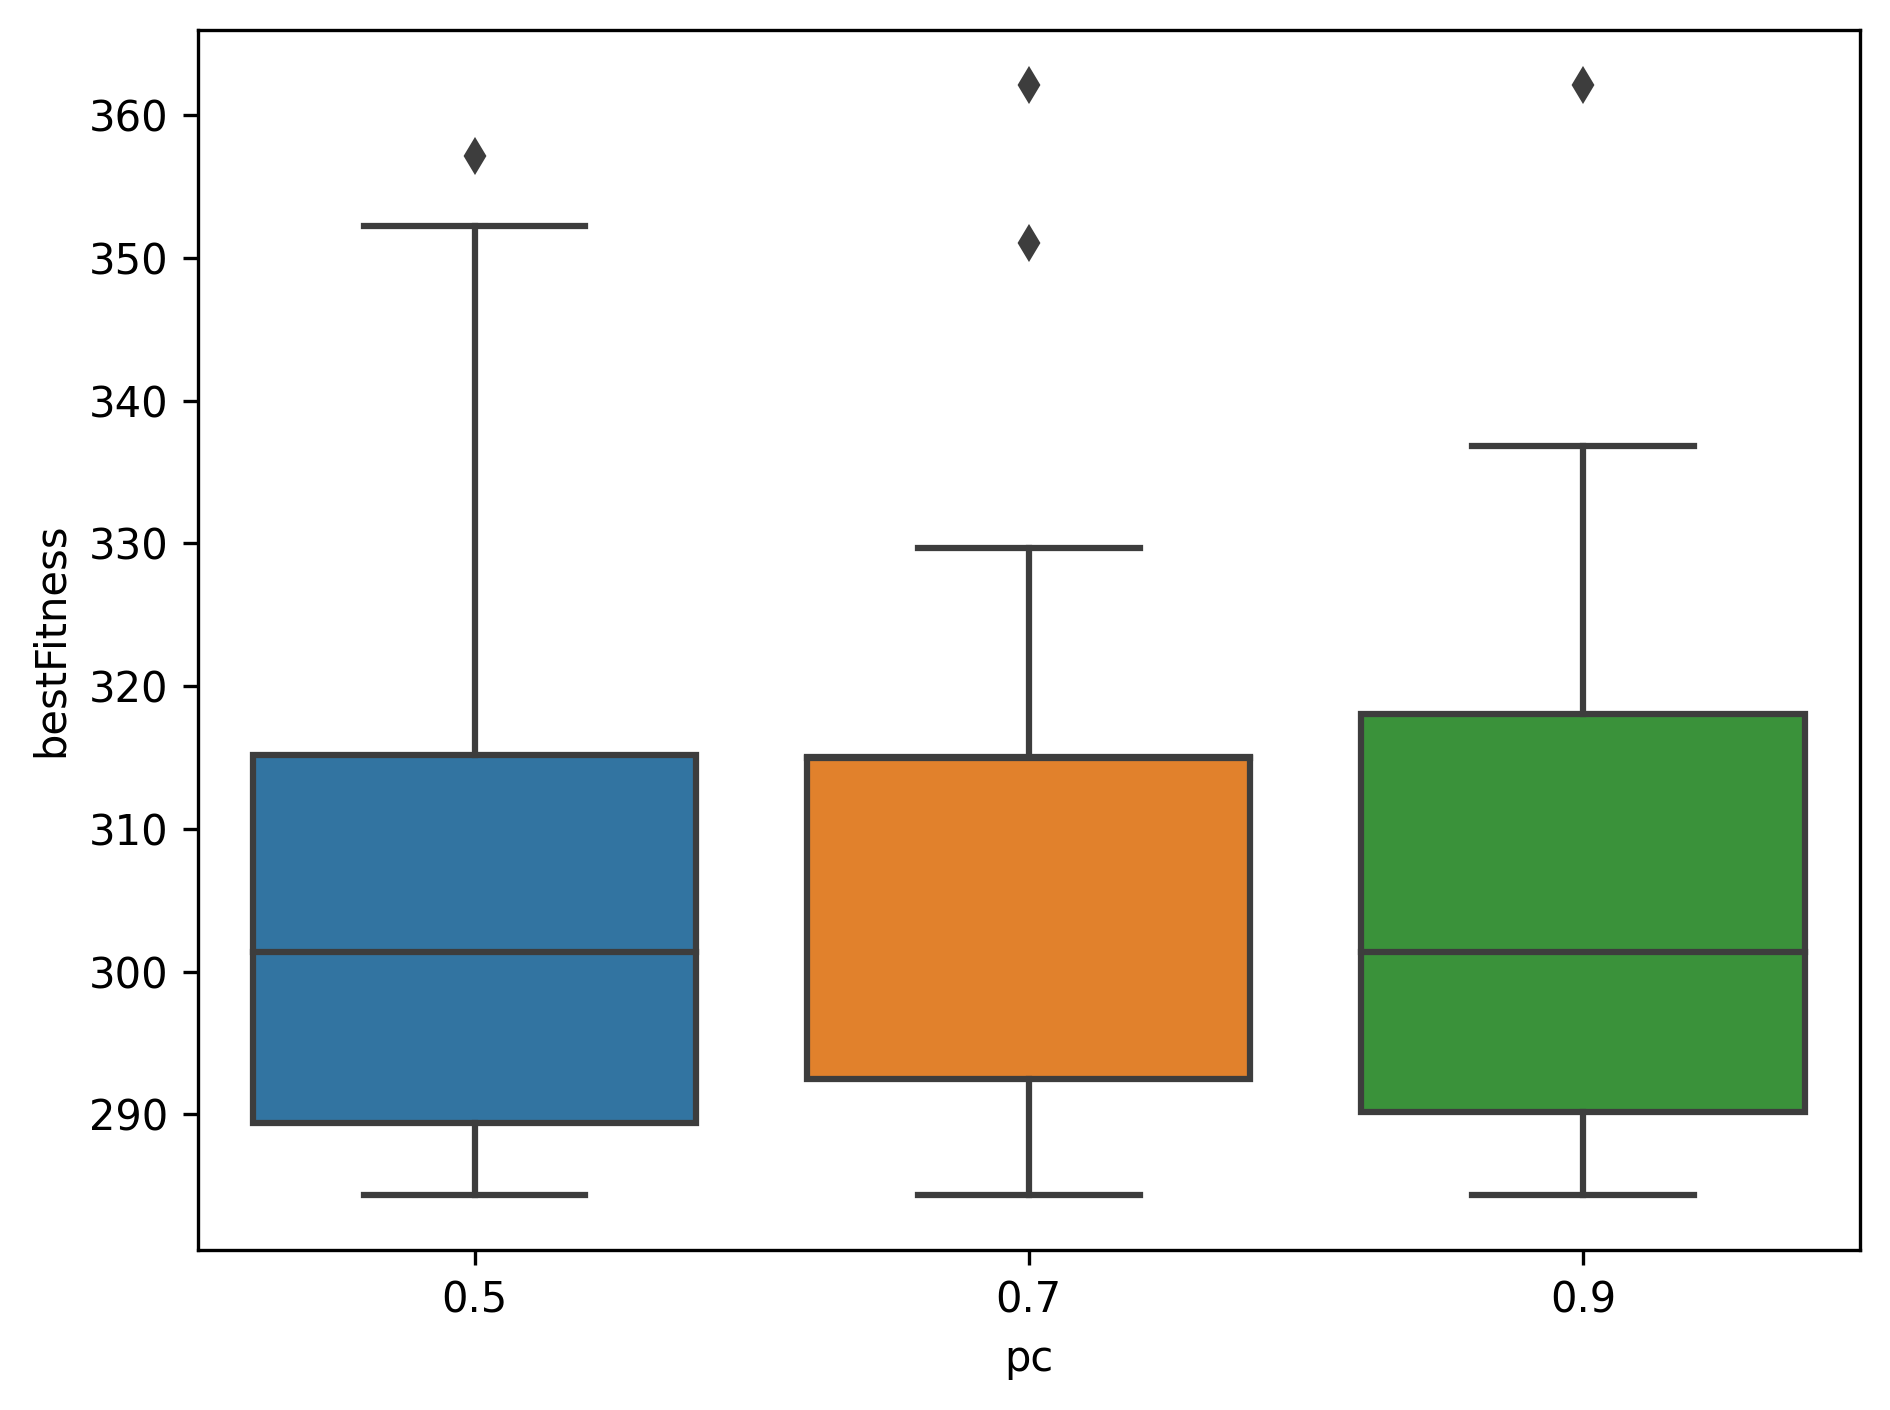

In [28]:
fig, ax = plt.subplots(dpi=300)
sns.boxplot(df2, x = 'pc', y = 'bestFitness')
plt.tight_layout()
plt.savefig('./figures/16citiesquality.png')

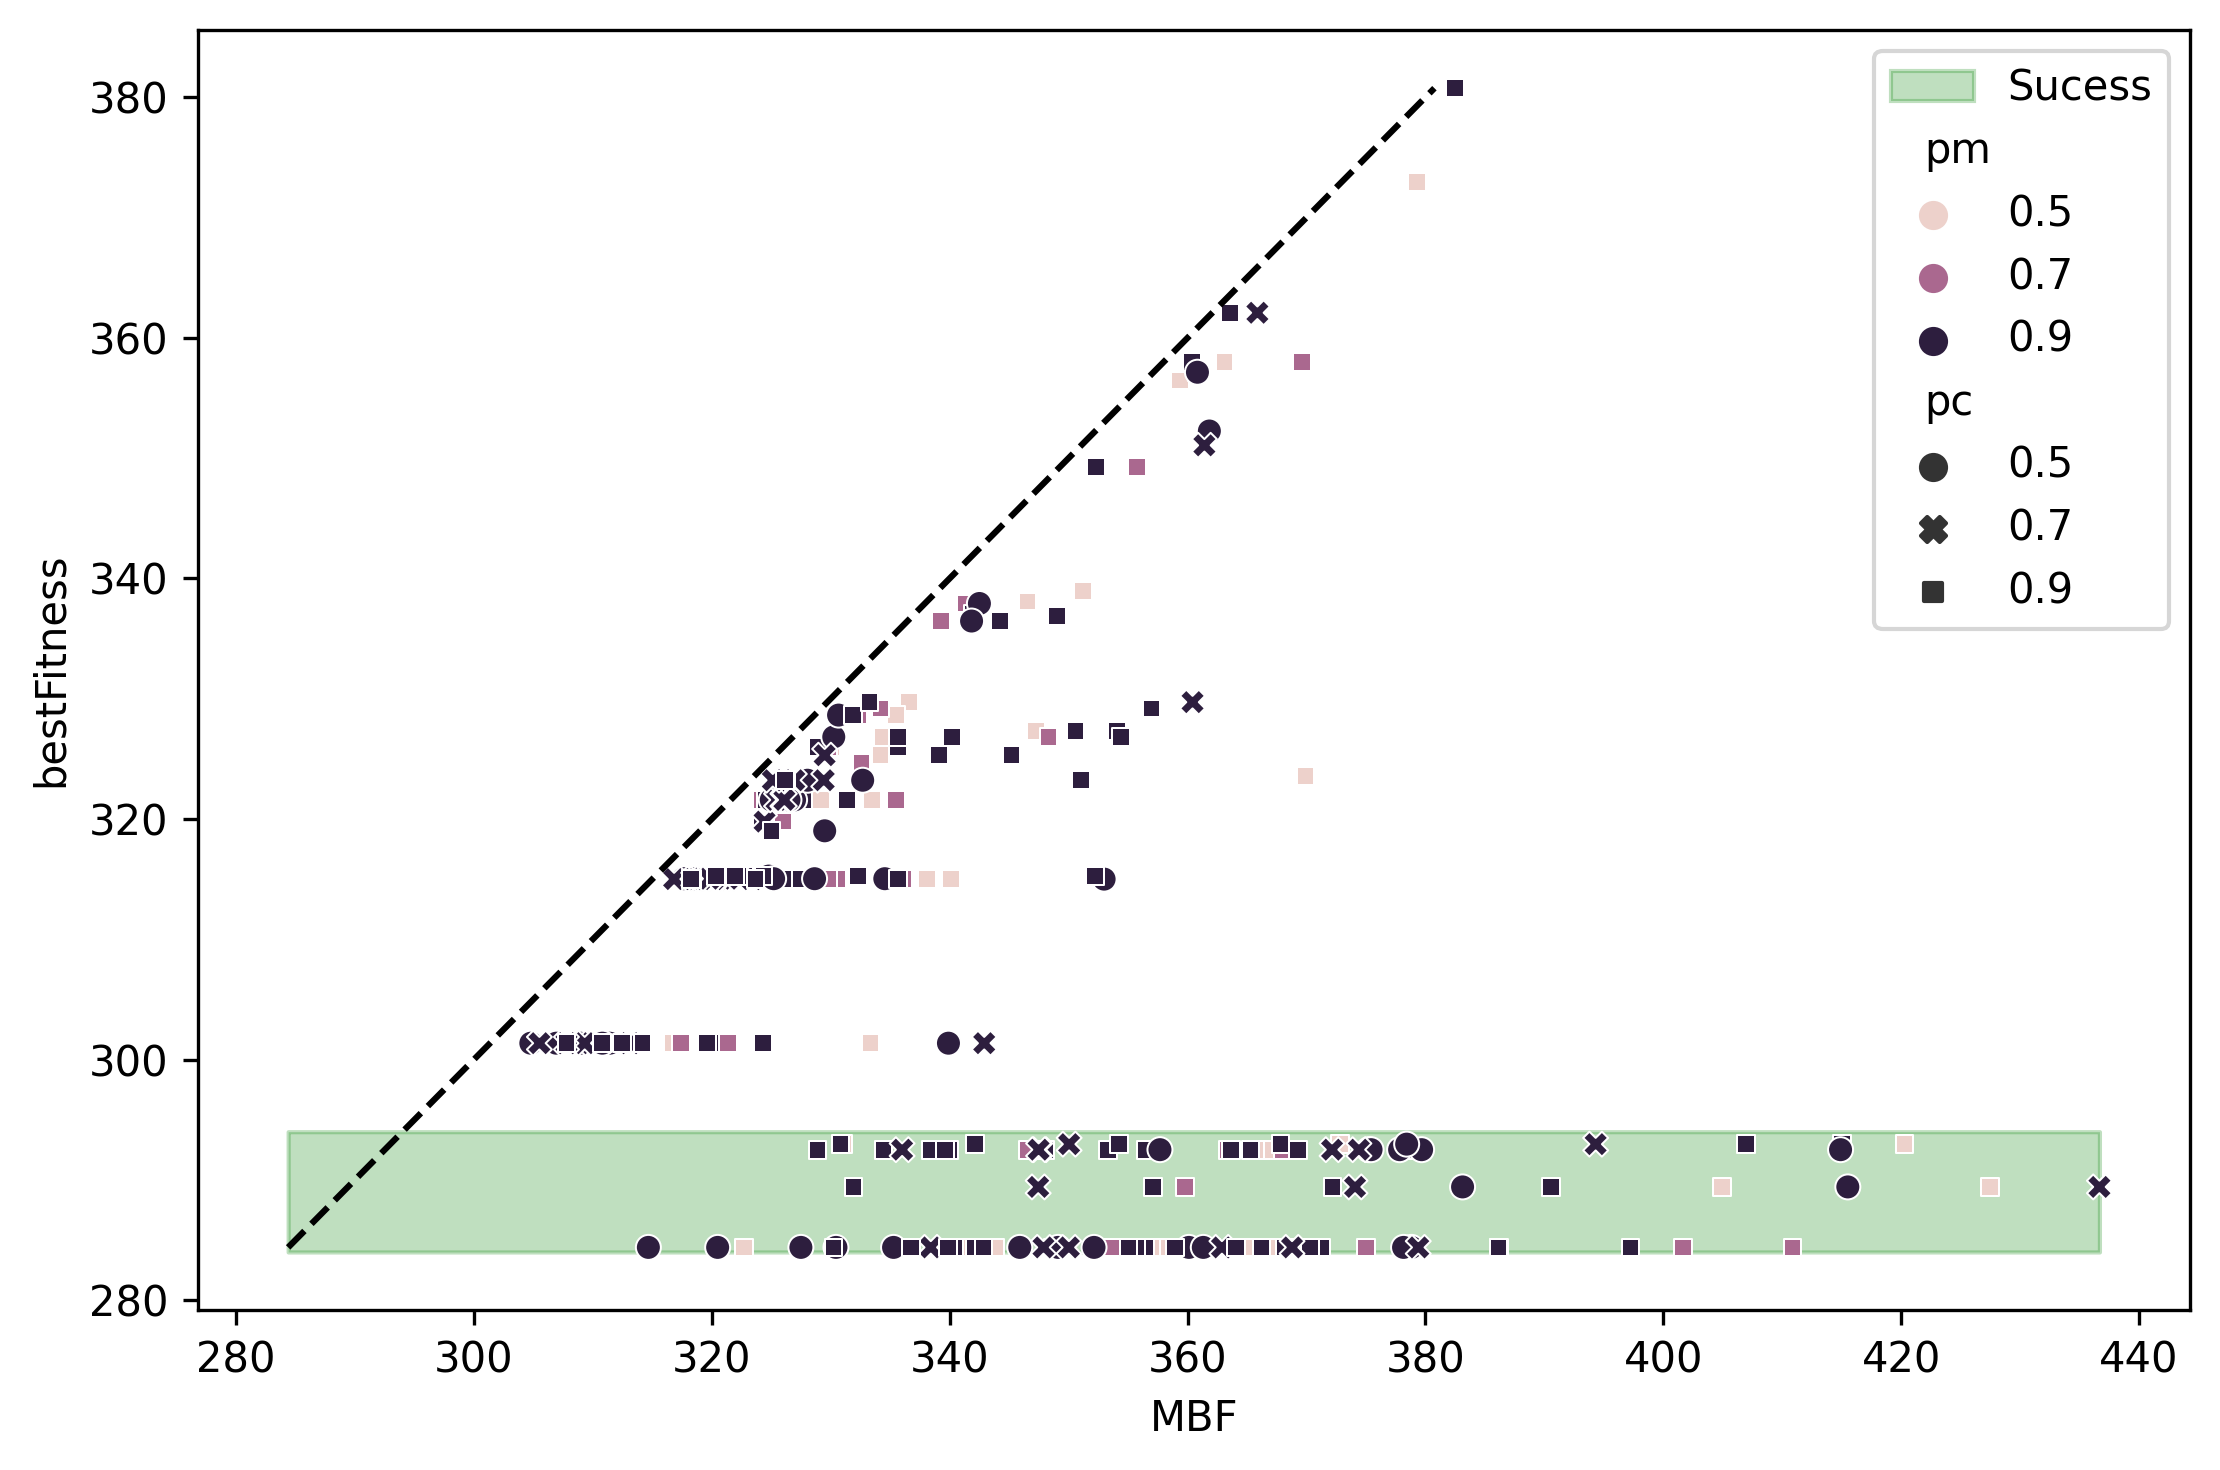

In [196]:
fig, ax = plt.subplots(figsize=(7.5, 5), dpi=300)
ax.fill_between(np.linspace(df['bestFitness'].min(), df['MBF'].max(), 1000), y1 = 294, y2 = 284, alpha = 0.25, color = 'g', label = 'Sucess')
ax.legend()
sns.scatterplot(df, x = 'MBF', y = 'bestFitness', hue = 'pm', style = 'pc', ax = ax)
x = np.linspace(df['bestFitness'].min(), df['bestFitness'].max(), 1000)
ax.plot(x, x, linestyle = 'dashed', c = 'black')
plt.tight_layout()
plt.savefig('./figures/16citiesMBFvsbF.png')

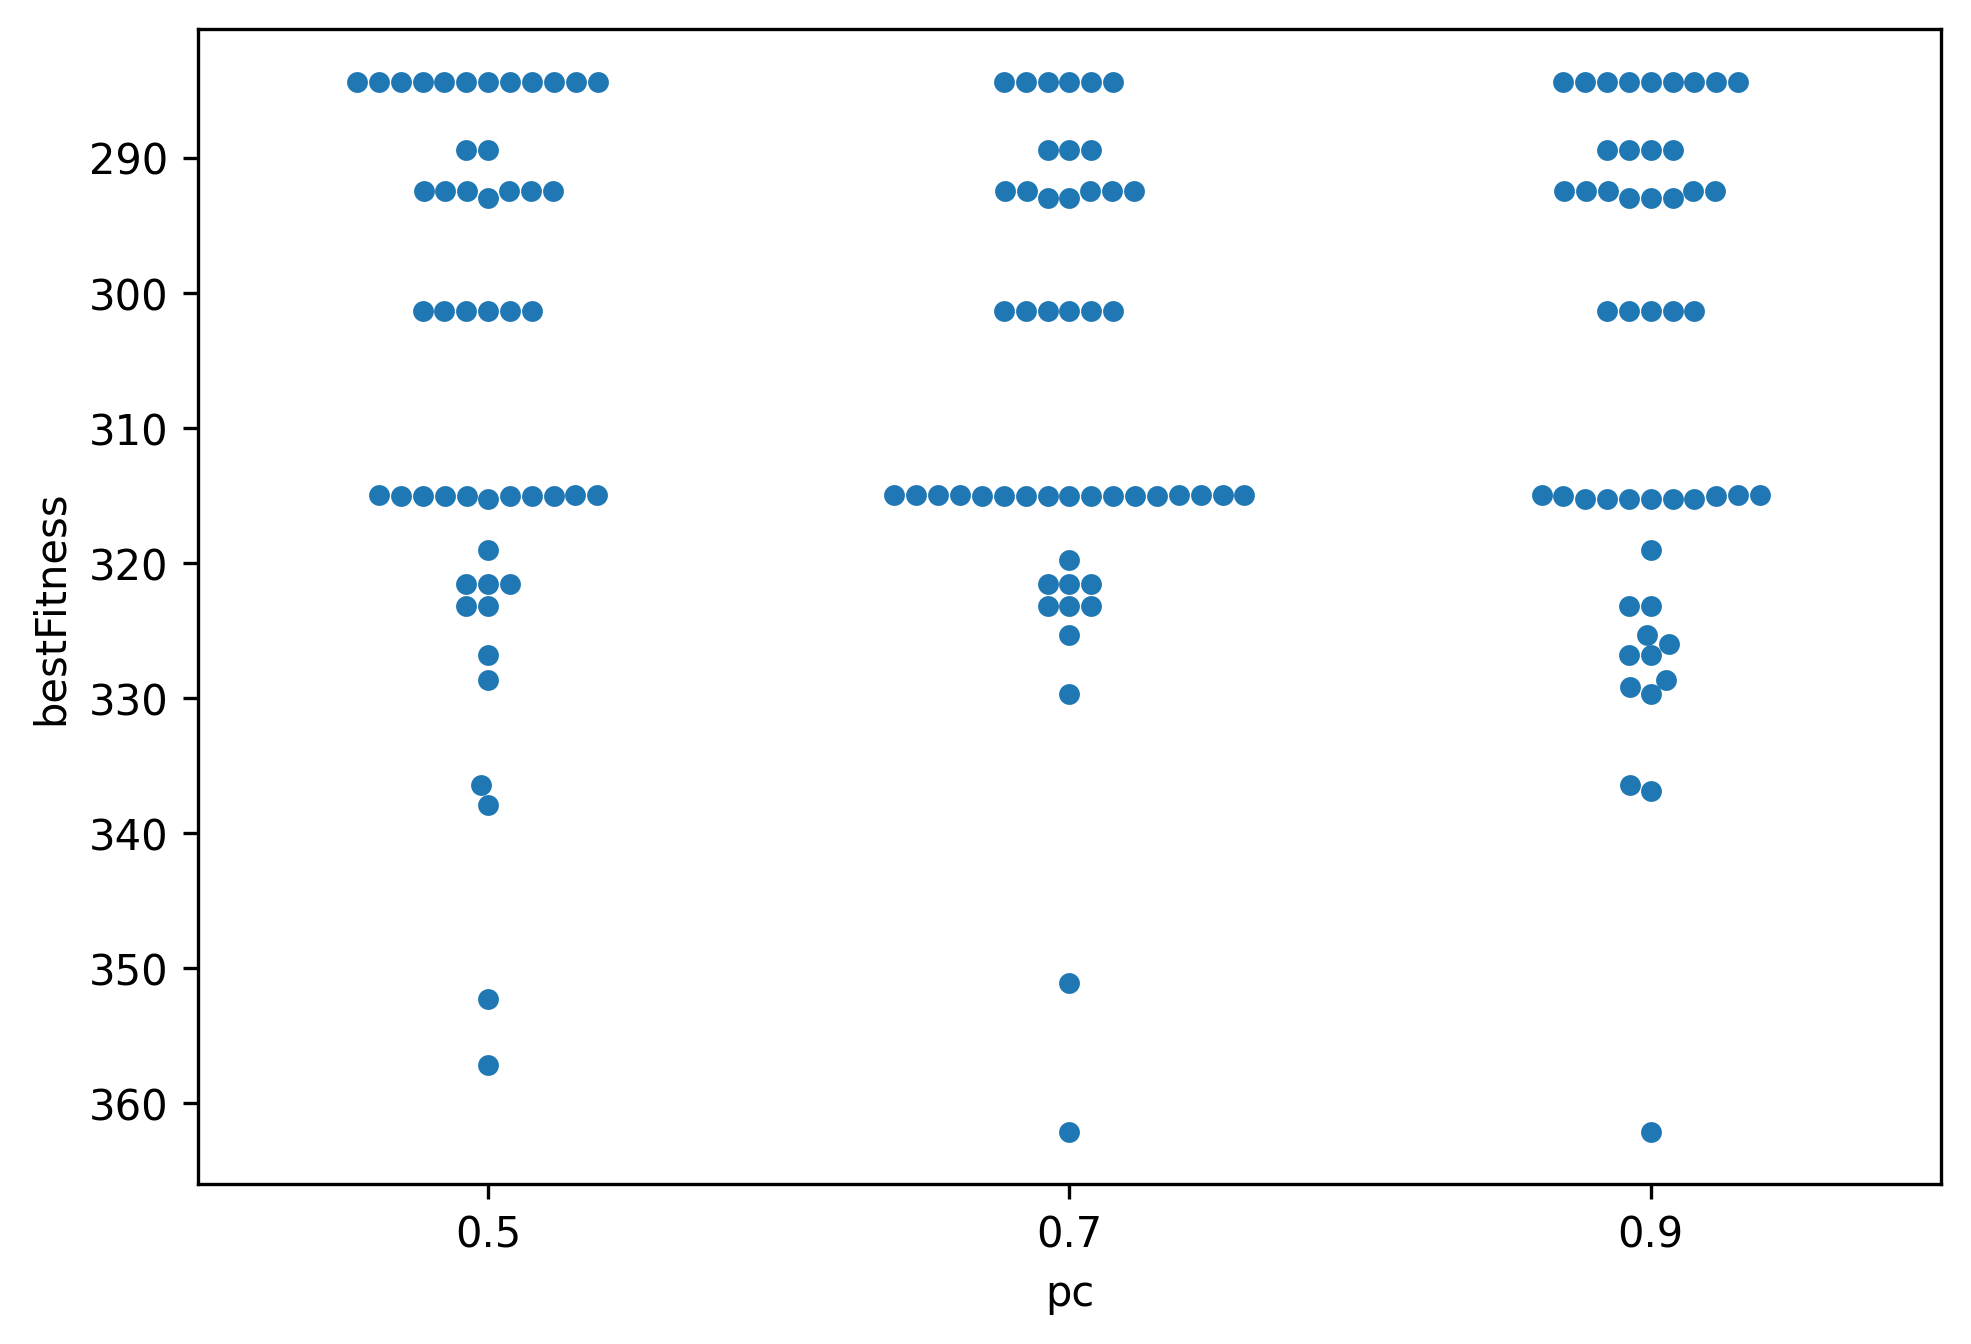

In [148]:
fig, ax = plt.subplots(figsize=(7.5, 5), dpi=300)
sns.swarmplot(df2, x = 'pc', y = 'bestFitness', ax = ax)
ax.invert_yaxis()

## Success rate (SR)

In [6]:
df_sr = df2[df2['nIter'] < 2999]

In [7]:
df_sr.describe()

,Unnamed: 0,MBF,bestFitness,nIter,pc,pm,popSize
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.0
mean,74.017241,360.449422,288.290350,627.603448,0.700000,0.9,10.0
std,45.556016,23.878380,3.837288,689.137038,0.171679,0.0,0.0
min,0.000000,314.666965,284.380863,70.000000,0.500000,0.9,10.0
25%,34.250000,342.314668,284.380863,212.000000,0.500000,0.9,10.0
50%,73.500000,358.299777,289.408934,332.000000,0.700000,0.9,10.0
75%,116.500000,375.379305,292.505503,671.250000,0.900000,0.9,10.0
max,148.000000,436.666082,292.964758,2855.000000,0.900000,0.9,10.0


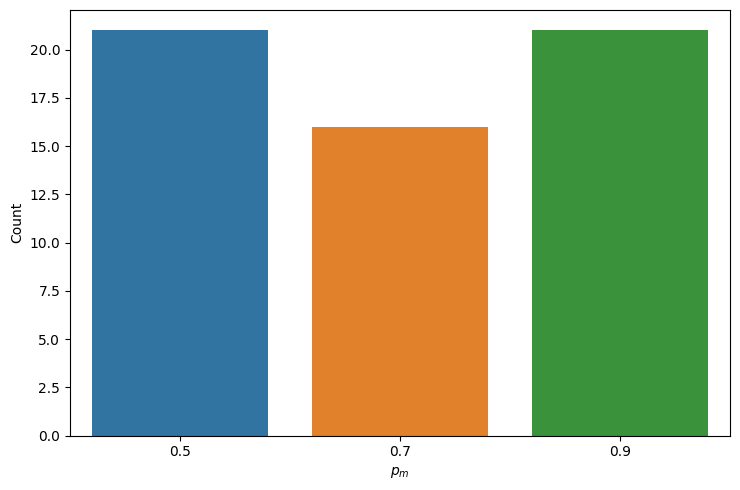

In [9]:
x = np.array(["0.5", "0.7", "0.9"])
y = np.zeros(3)
y[0] = df_sr['pc'][df_sr['pc'] == 0.5].count()
y[1] = df_sr['pc'][df_sr['pc'] == 0.7].count()
y[2] = df_sr['pc'][df_sr['pc'] == 0.9].count()
fig, ax = plt.subplots(figsize=(7.5, 5)) #, dpi=300)
sns.barplot(x = x, y = y, ax = ax)
ax.set_ylabel('Count')
ax.set_xlabel(r'$p_m$')
plt.tight_layout()
plt.savefig('./figures/16citiesSR.png')

In [14]:
y = np.zeros(3)
y[0] = df_sr['nIter'][df_sr['pc'] == 0.5].mean()
y[1] = df_sr['nIter'][df_sr['pc'] == 0.7].mean()
y[2] = df_sr['nIter'][df_sr['pc'] == 0.9].mean()

In [20]:
df_sr.groupby('pc').describe()['nIter']

,count,mean,std,min,25%,50%,75%,max
pc,,,,,,,,
0.5,21.0,502.190476,536.908988,84.0,211.0,287.0,507.0,1923.0
0.7,16.0,500.312500,551.861060,70.0,167.5,253.0,496.5,1907.0
0.9,21.0,850.000000,869.136583,179.0,330.0,435.0,826.0,2855.0


### Complex problem

In [22]:
df48 = pd.read_csv('./evaluation/evPc48cities.csv')
df48.describe()

,Unnamed: 0,MBF,bestFitness,nIter,pc,pm,popSize
count,60.000000,60.000000,60.000000,60.0,60.000000,60.0,60.0
mean,29.500000,52747.468868,47006.015012,2999.0,0.700000,0.9,100.0
std,17.464249,3550.616218,3922.165140,0.0,0.164677,0.0,0.0
min,0.000000,45473.707135,38770.198312,2999.0,0.500000,0.9,100.0
25%,14.750000,50497.315345,45001.965795,2999.0,0.500000,0.9,100.0
50%,29.500000,52400.535665,46252.792585,2999.0,0.700000,0.9,100.0
75%,44.250000,55461.705982,49413.750211,2999.0,0.900000,0.9,100.0
max,59.000000,60621.206621,56365.636753,2999.0,0.900000,0.9,100.0


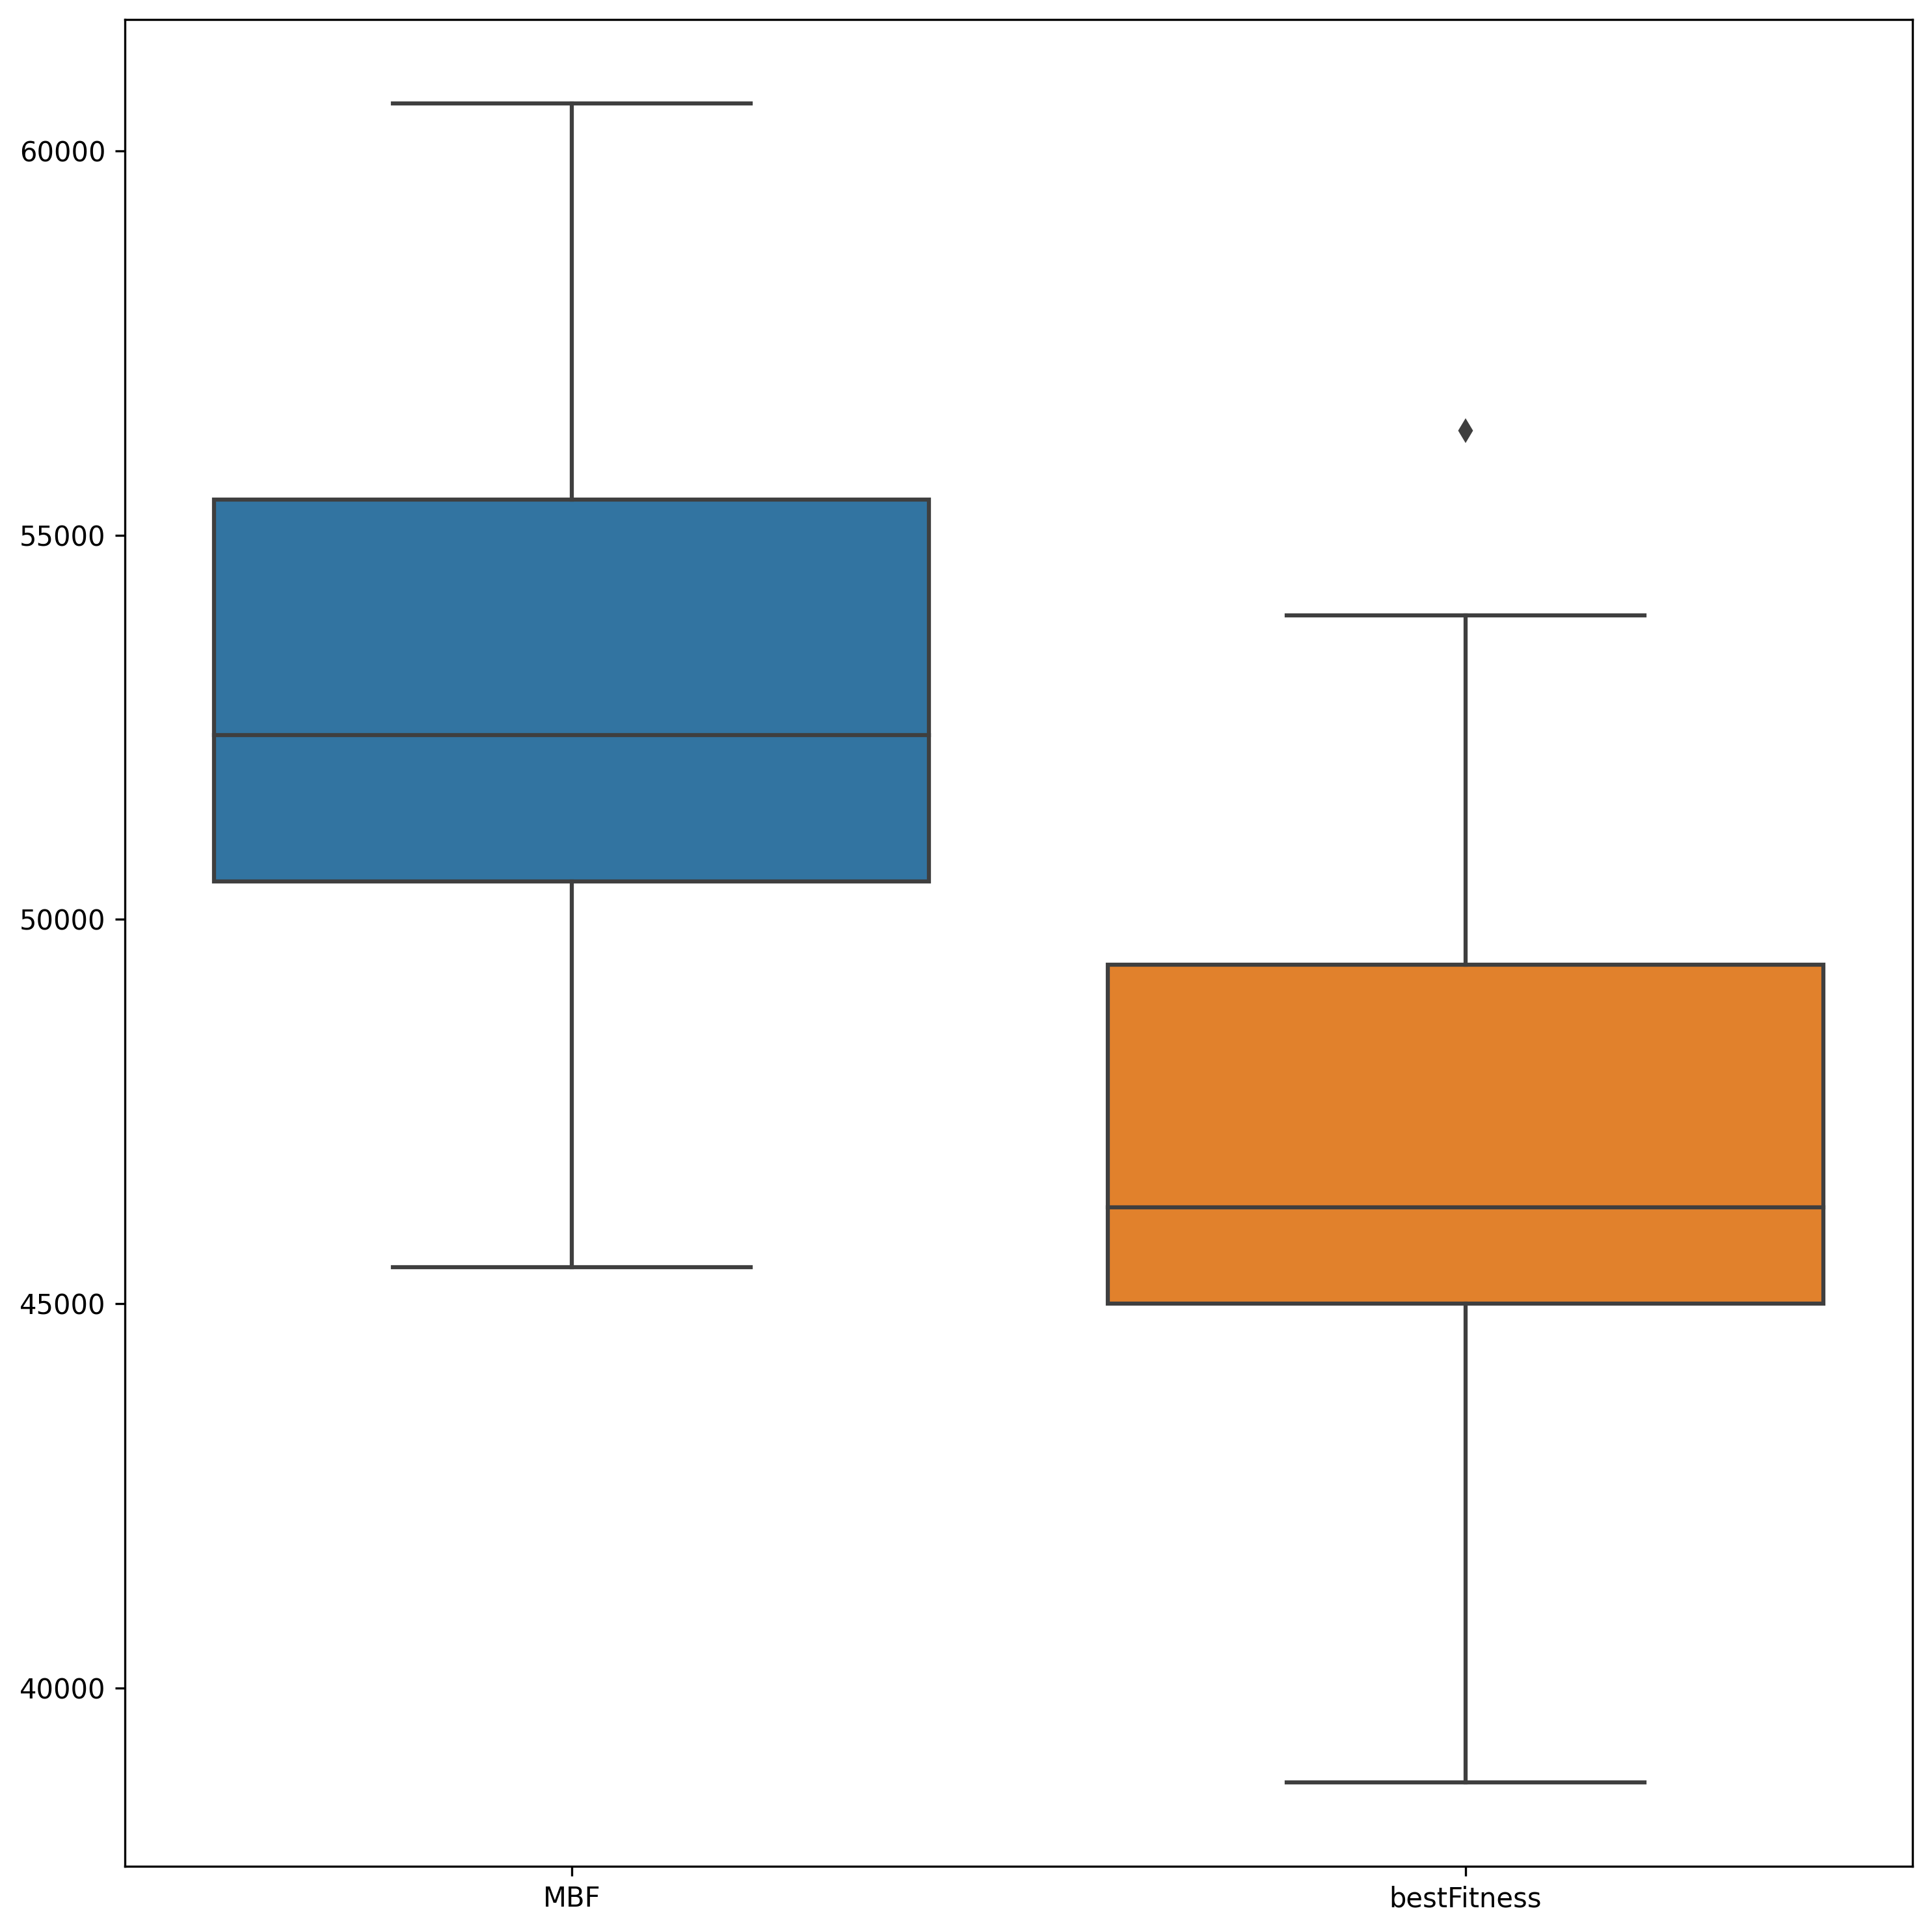

In [23]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
sns.boxplot(df48[['MBF', 'bestFitness']])
plt.tight_layout()
plt.savefig('./figures/48citiesboxplot.png')

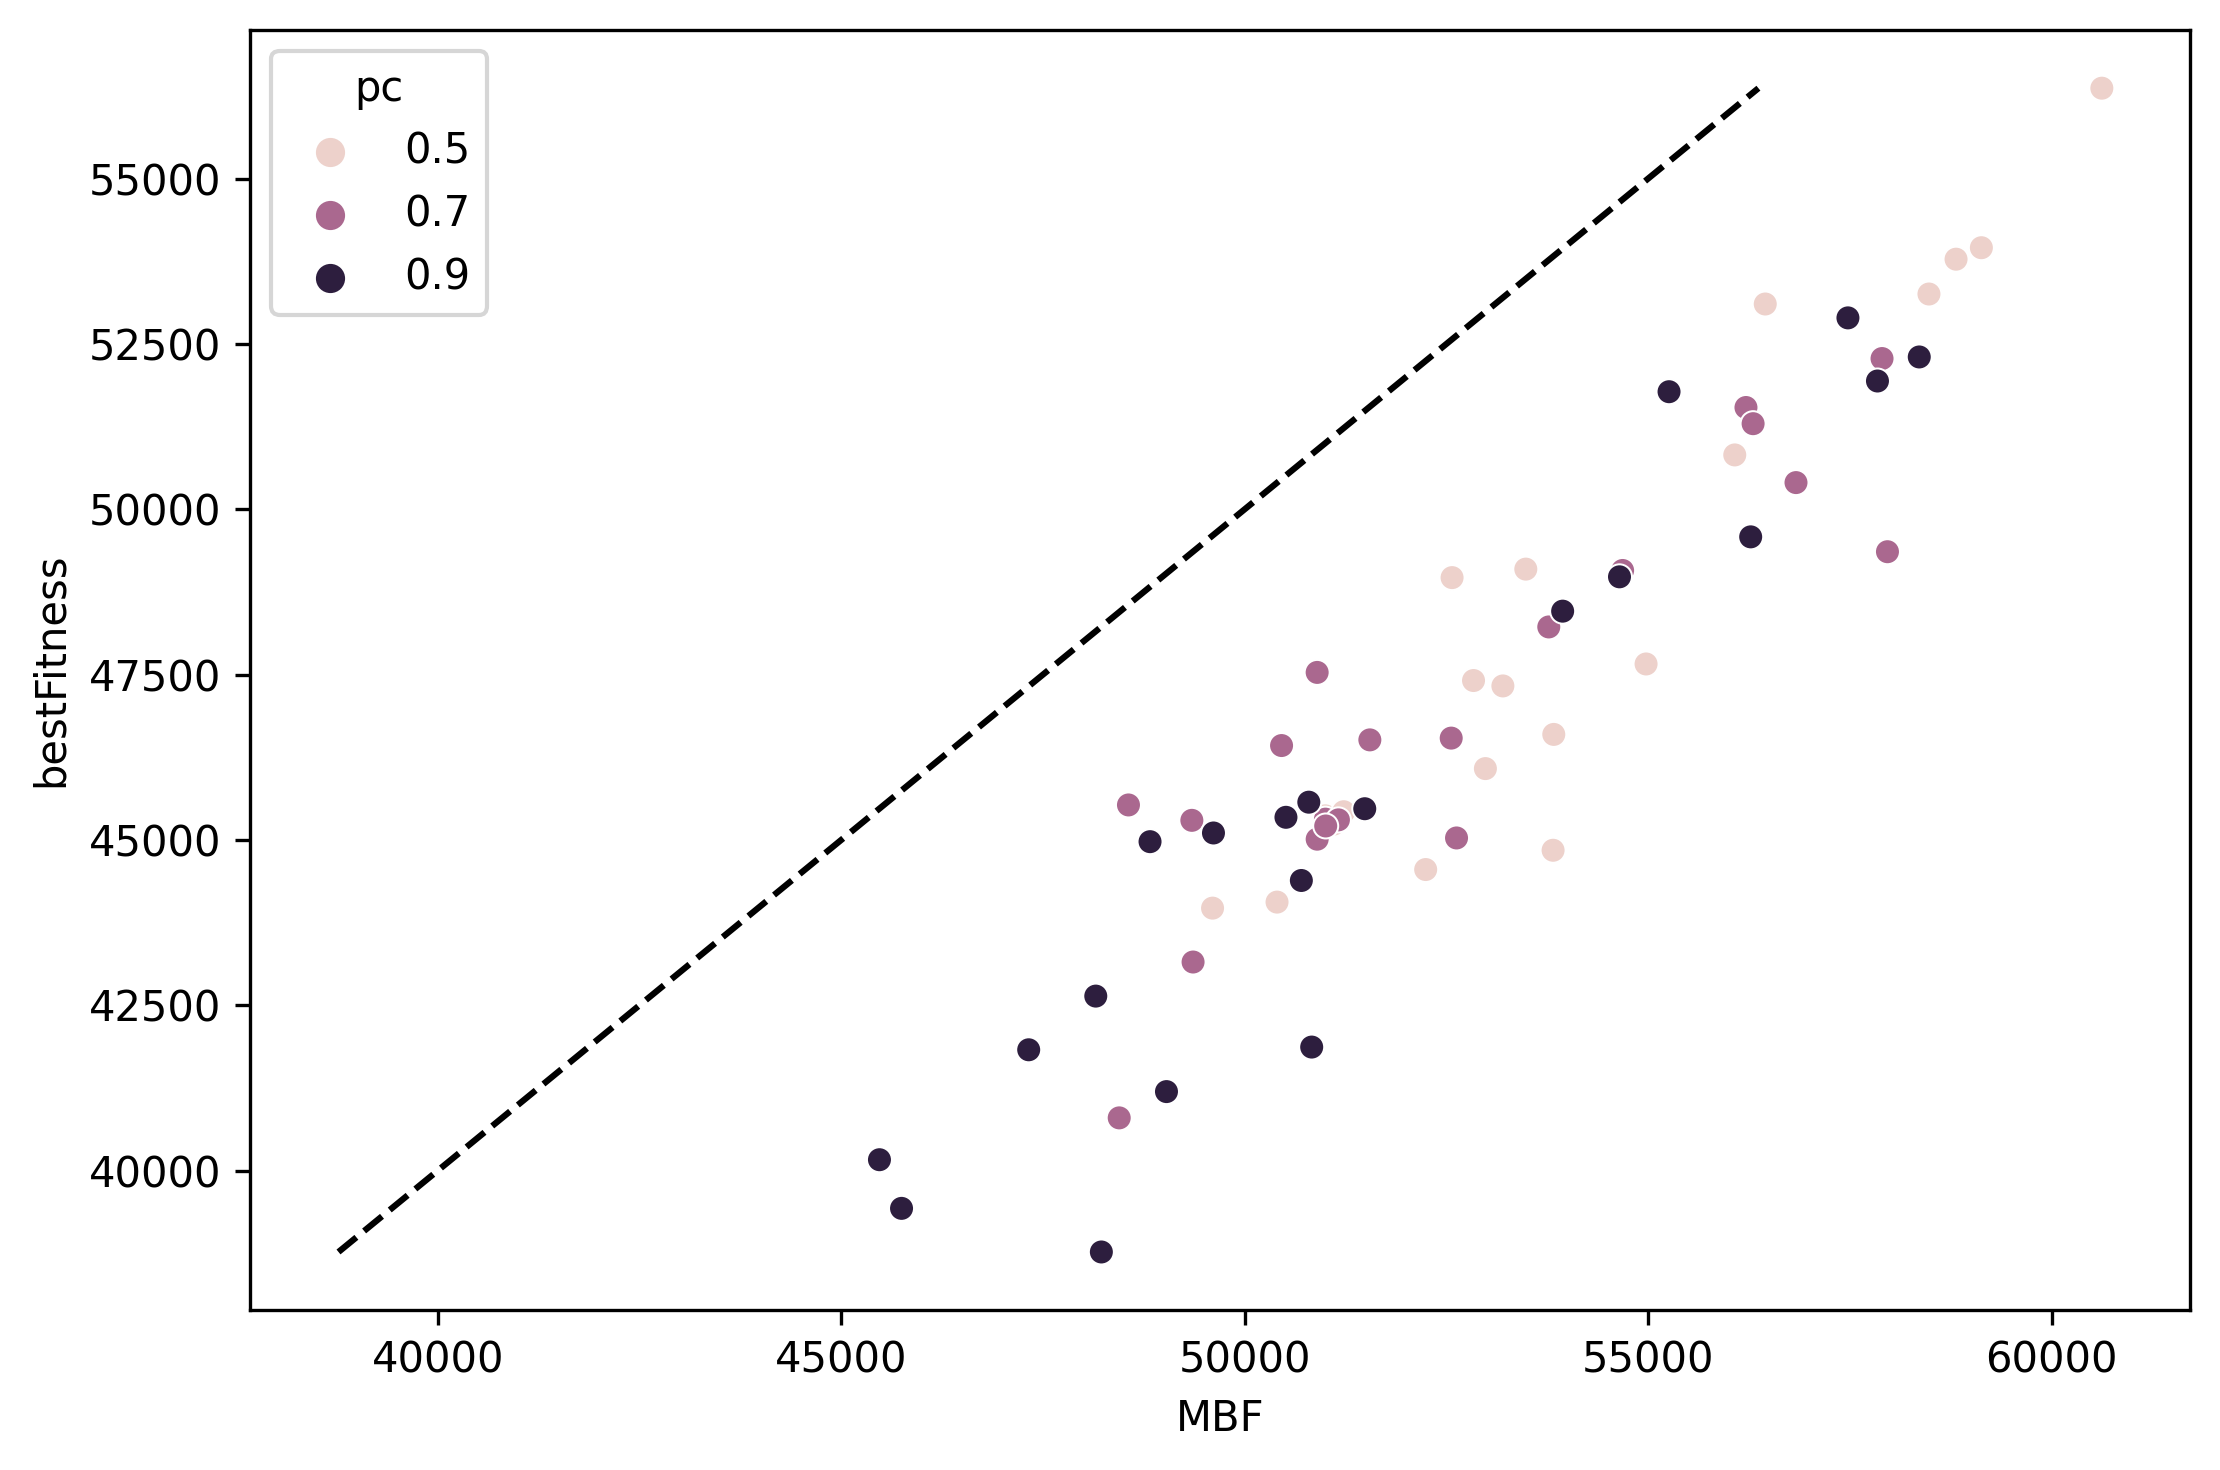

In [24]:
fig, ax = plt.subplots(figsize=(7.5, 5), dpi=300)
sns.scatterplot(df48, x = 'MBF', y = 'bestFitness', hue = 'pc', ax = ax)
x = np.linspace(df48['bestFitness'].min(), df48['bestFitness'].max(), 1000)
ax.plot(x, x, linestyle = 'dashed', c = 'black')
plt.tight_layout()
plt.savefig('./figures/48citiesMBFvsbF.png')

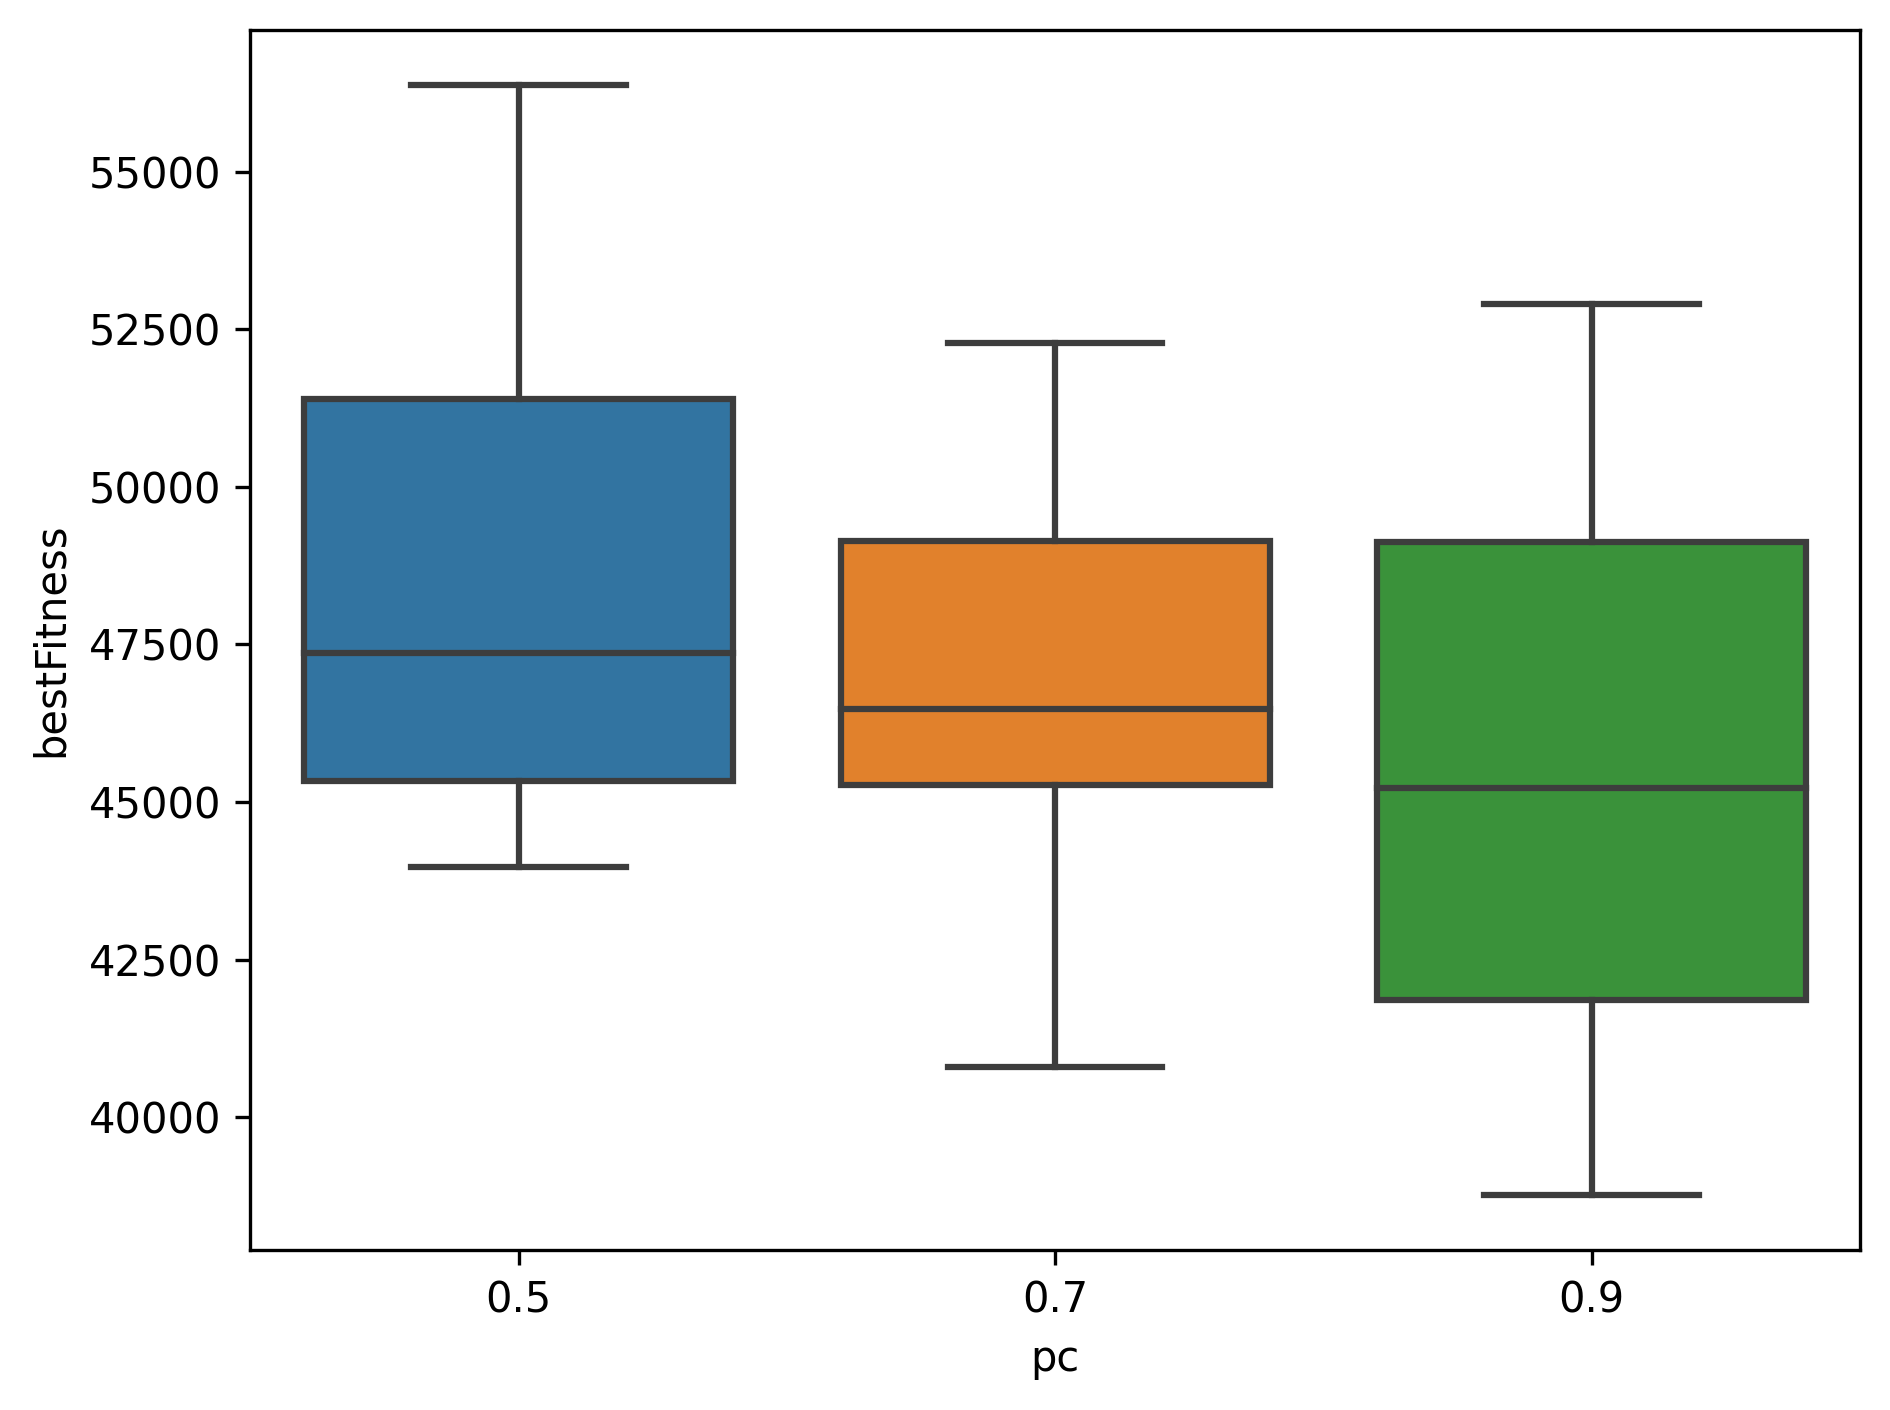

In [27]:
fig, ax = plt.subplots(dpi=300)
sns.boxplot(df48, x='pc', y = 'bestFitness', ax=ax)
plt.tight_layout()
plt.savefig('./figures/48citiesquality.png')

In [182]:
df48_sr = df48[df48['nIter'] < 2999]
df48_sr.describe()

,Unnamed: 0,MBF,bestFitness,nIter,pc,pm,popSize
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x = np.array(["0.5", "0.7", "0.9"])
y = np.zeros(3)
y[0] = df_sr['pc'][df_sr['pc'] == 0.5].count()
y[1] = df_sr['pc'][df_sr['pc'] == 0.7].count()
y[2] = df_sr['pc'][df_sr['pc'] == 0.9].count()
fig, ax = plt.subplots(figsize=(7.5, 5)) #, dpi=300)
sns.barplot(x = x, y = y, ax = ax)
ax.set_ylabel('Count')
ax.set_xlabel(r'$p_m$')
plt.tight_layout()
plt.savefig('./figures/16citiesSR.png')